# ...in Python

## PubChem API in Python

by Avery Fernandez

**PubChem API Documentation**: https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access

These recipe examples were tested on May 16, 2022.

**Attribution:** This tutorial was adapted from supporting information in:

**Scalfani, V. F.**; Ralph, S. C. Alshaikh, A. A.; Bara, J. E. Programmatic Compilation of Chemical Data and Literature From PubChem Using Matlab. *Chemical Engineering Education*, **2020**, *54*, 230. https://doi.org/10.18260/2-1-370.660-115508 and https://github.com/vfscalfani/MATLAB-cheminformatics)

### Setup

First, import libraries:

In [55]:
import requests
from pprint import pprint
from time import sleep

Define the PubChem PUG-REST API base URL:

In [56]:
api = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/'

### 1. PubChem Similarity

#### Get compound image

We can search for a compound and display an image, for example: 1-Butyl-3-methyl-imidazolium; CID = 2734162

In [57]:
# Request PNG from PubChem and save file
compoundID = "2734162"
img = requests.get(api + '/cid/' + compoundID + "/PNG").content
with open("2734162.png", "wb") as out:
    out.write(img)

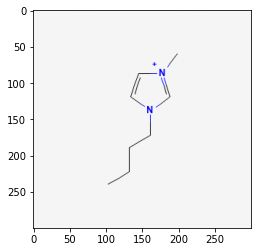

In [58]:
# Display compound PNG with Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('2734162.png')
plt.imshow(img)
plt.show()

#### Retrieve InChI and SMILES

In [59]:
request = requests.get(api + 'cid/' + compoundID + '/property/inchi,IsomericSMILES/JSON').json()
pprint(request)

{'PropertyTable': {'Properties': [{'CID': 2734162,
                                   'InChI': 'InChI=1S/C8H15N2/c1-3-4-5-10-7-6-9(2)8-10/h6-8H,3-5H2,1-2H3/q+1',
                                   'IsomericSMILES': 'CCCCN1C=C[N+](=C1)C'}]}}


In [60]:
# Extract InChI
request["PropertyTable"]["Properties"][0]["InChI"]

'InChI=1S/C8H15N2/c1-3-4-5-10-7-6-9(2)8-10/h6-8H,3-5H2,1-2H3/q+1'

In [61]:
# Extract Isomeric SMILES
request["PropertyTable"]["Properties"][0]["IsomericSMILES"]

'CCCCN1C=C[N+](=C1)C'

#### Perform a Similarity Search

We will use the PubChem API to perform a Fingerprint Tanimoto Similarity Search (SS).

(2D Tanimoto threshold 95% to 1-Butyl-3-methyl-imidazolium; CID = 2734162)

In [62]:
api = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/'
request = requests.get(api + "fastsimilarity_2d/cid/" + compoundID + "/cids/JSON?Threshold=95").json()
idList = request["IdentifierList"]["CID"]

In the above request value, you can adjust to the desired Tanimoto threshold (i.e., 97, 90, etc.)

In [63]:
len(idList)

297

In [64]:
# display first 25
idList[0:25]

[529334,
 304622,
 118785,
 61347,
 12971008,
 11448496,
 11424151,
 11171745,
 11160028,
 2734236,
 2734162,
 2734161,
 11245926,
 53384410,
 11788435,
 5245884,
 2734168,
 139254006,
 91983981,
 87560886,
 87559770,
 11448364,
 10537570,
 10154187,
 141109628]

#### Retrieve Identifier and Property Data

Get the following data for the retrieved CIDs (idList): InChI, Isomeric SMILES, MW, Heavy Atom Count, Rotable Bond Count, and Charge

In [65]:
api = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/'
compoundDictionary = []
for cid in idList:
    request = requests.get(api + 'cid/' + str(cid) + "/property/InChI,IsomericSMILES,MolecularWeight,HeavyAtomCount,RotatableBondCount,Charge/JSON").json()
    compoundDictionary.append(request["PropertyTable"]["Properties"][0])
    sleep(1)

In [66]:
len(compoundDictionary)

297

In [69]:
pprint(compoundDictionary[0:5])

[{'CID': 529334,
  'Charge': 0,
  'HeavyAtomCount': 10,
  'InChI': 'InChI=1S/C8H14N2/c1-2-3-4-6-10-7-5-9-8-10/h5,7-8H,2-4,6H2,1H3',
  'IsomericSMILES': 'CCCCCN1C=CN=C1',
  'MolecularWeight': '138.21',
  'RotatableBondCount': 4},
 {'CID': 304622,
  'Charge': 0,
  'HeavyAtomCount': 10,
  'InChI': 'InChI=1S/C8H14N2/c1-3-4-6-10-7-5-9-8(10)2/h5,7H,3-4,6H2,1-2H3',
  'IsomericSMILES': 'CCCCN1C=CN=C1C',
  'MolecularWeight': '138.21',
  'RotatableBondCount': 3},
 {'CID': 118785,
  'Charge': 0,
  'HeavyAtomCount': 8,
  'InChI': 'InChI=1S/C6H10N2/c1-2-4-8-5-3-7-6-8/h3,5-6H,2,4H2,1H3',
  'IsomericSMILES': 'CCCN1C=CN=C1',
  'MolecularWeight': '110.16',
  'RotatableBondCount': 2},
 {'CID': 61347,
  'Charge': 0,
  'HeavyAtomCount': 9,
  'InChI': 'InChI=1S/C7H12N2/c1-2-3-5-9-6-4-8-7-9/h4,6-7H,2-3,5H2,1H3',
  'IsomericSMILES': 'CCCCN1C=CN=C1',
  'MolecularWeight': '124.18',
  'RotatableBondCount': 3},
 {'CID': 12971008,
  'Charge': 0,
  'HeavyAtomCount': 10,
  'InChI': 'InChI=1S/C7H13N2.HI/c1-3-4-9-6-5

#### Data Table
We can display the dictionary as a data table, but we will only do this for the first 25:

In [70]:
# numbers in print statement indicate amount of space used
print ("{:<10} {:<8} {:<16} {:<35} {:<40} {:<18} {:<4} ".format("CID", "Charge", "HeavyAtomCount", "InChI", "IsomericSMILES", "MolecularWeight", "RotatableBondCount"))
for compound in compoundDictionary[0:25]:
    cid = compound["CID"]
    charge = compound["Charge"]
    heavyAtom = compound["HeavyAtomCount"]
    inchi = compound["InChI"][0:30] + "..." # only display first 30 characters of InChI
    isomeric = compound["IsomericSMILES"]
    molecular = compound["MolecularWeight"]
    rotatable = compound["RotatableBondCount"]
    print ("{:<10} {:<8} {:<16} {:<35} {:<40} {:<18} {:<4} ".format(cid, charge, heavyAtom, inchi, isomeric, molecular, rotatable))

CID        Charge   HeavyAtomCount   InChI                               IsomericSMILES                           MolecularWeight    RotatableBondCount 
529334     0        10               InChI=1S/C8H14N2/c1-2-3-4-6-10...   CCCCCN1C=CN=C1                           138.21             4    
304622     0        10               InChI=1S/C8H14N2/c1-3-4-6-10-7...   CCCCN1C=CN=C1C                           138.21             3    
118785     0        8                InChI=1S/C6H10N2/c1-2-4-8-5-3-...   CCCN1C=CN=C1                             110.16             2    
61347      0        9                InChI=1S/C7H12N2/c1-2-3-5-9-6-...   CCCCN1C=CN=C1                            124.18             3    
12971008   0        10               InChI=1S/C7H13N2.HI/c1-3-4-9-6...   CCCN1C=C[N+](=C1)C.[I-]                  252.10             2    
11448496   0        11               InChI=1S/C8H15N2.HI/c1-3-4-5-1...   CCCCN1C=C[N+](=C1)C.[I-]                 266.12             3    
11424151   0 

#### Retrieve Images of Compounds from Similarity Search

529334


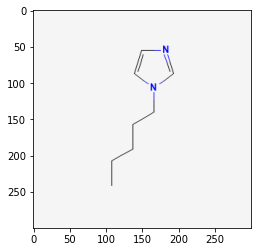

304622


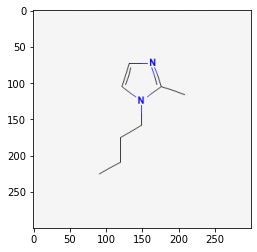

118785


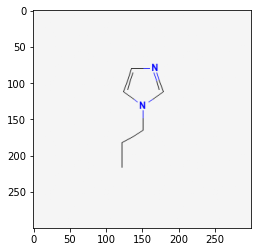

61347


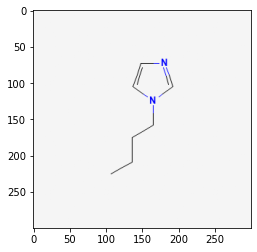

12971008


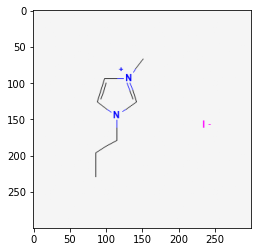

In [71]:
# we will only do this for the first five:
api = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/"
for cid in idList[0:5]:
    request = requests.get(api + "cid/" + str(cid) + "/PNG").content
    sleep(1)
    with open(str(cid) + ".png", "wb") as out:
        out.write(request)
    pprint(cid)
    img = mpimg.imread(str(cid) + ".png")
    plt.imshow(img)
    plt.show()

### 2. PubChem SMARTS Search

Search for chemical structures from a SMARTS substructure query.

#### Define SMARTS queries

View pattern syntax at: https://smartsview.zbh.uni-hamburg.de/

Note: These are vinyl imidazolium substructure searches

In [72]:
smartsQ = ["[CR0H2][n+]1[cH1][cH1]n([CR0H1]=[CR0H2])[cH1]1","[CR0H2][n+]1[cH1][cH1]n([CR0H2][CR0H1]=[CR0H2])[cH1]1","[CR0H2][n+]1[cH1][cH1]n([CR0H2][CR0H2][CR0H1]=[CR0H2])[cH1]1"]

Add your own SMARTS queries to customize. You can add as many as desired within a list

#### Perform a SMARTS query search

In [73]:
api = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/"
combinedList = []
for smarts in smartsQ:
    request = requests.get(api + "fastsubstructure/smarts/" + smarts + "/cids/JSON").json()
    combinedList += request["IdentifierList"]["CID"]
    sleep(1)

In [74]:
len(combinedList)

830

In [75]:
pprint(combinedList[0:25]) # display 25

[121235111,
 86657882,
 46178576,
 24766550,
 139254006,
 132274871,
 129853306,
 129853221,
 129850195,
 87560886,
 87559770,
 87327009,
 59435292,
 141478618,
 141176071,
 139241369,
 138404213,
 138373746,
 135377330,
 135361018,
 132427329,
 132275640,
 129862663,
 129850437,
 129850146]


#### Retrieve Identifier and Property Data

In [76]:
smartsList = []
for cid in combinedList[0:5]: # demo for first 5 CIDs
    request = requests.get(api + "cid/" + str(cid) + "/property/InChI,CanonicalSMILES,MolecularWeight,IUPACName,HeavyAtomCount,CovalentUnitCount,Charge/JSON").json()
    smartsList.append(request["PropertyTable"]["Properties"][0])
    sleep(1)
pprint(smartsList[0:5])

[{'CID': 121235111,
  'CanonicalSMILES': 'CC[N+]1=CN(C=C1)C=C.C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F',
  'Charge': 0,
  'CovalentUnitCount': 2,
  'HeavyAtomCount': 24,
  'IUPACName': 'bis(trifluoromethylsulfonyl)azanide;1-ethenyl-3-ethylimidazol-3-ium',
  'InChI': 'InChI=1S/C7H11N2.C2F6NO4S2/c1-3-8-5-6-9(4-2)7-8;3-1(4,5)14(10,11)9-15(12,13)2(6,7)8/h3,5-7H,1,4H2,2H3;/q+1;-1',
  'MolecularWeight': '403.3'},
 {'CID': 86657882,
  'CanonicalSMILES': 'CCCCCCCC[N+]1=CN(C=C1)C=C.[Br-]',
  'Charge': 0,
  'CovalentUnitCount': 2,
  'HeavyAtomCount': 16,
  'IUPACName': '1-ethenyl-3-octylimidazol-3-ium;bromide',
  'InChI': 'InChI=1S/C13H23N2.BrH/c1-3-5-6-7-8-9-10-15-12-11-14(4-2)13-15;/h4,11-13H,2-3,5-10H2,1H3;1H/q+1;/p-1',
  'MolecularWeight': '287.24'},
 {'CID': 46178576,
  'CanonicalSMILES': 'CCCCCCCCCCCCCCCC[N+]1=CN(C=C1)C=C.[Br-]',
  'Charge': 0,
  'CovalentUnitCount': 2,
  'HeavyAtomCount': 24,
  'IUPACName': '1-ethenyl-3-hexadecylimidazol-3-ium;bromide',
  'InChI': 'InChI=1S/C21H39N2.BrH/c

#### Retrieve Images of CID Compounds from SMARTS Search

121235111


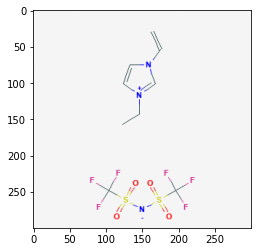

86657882


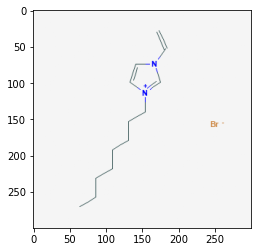

46178576


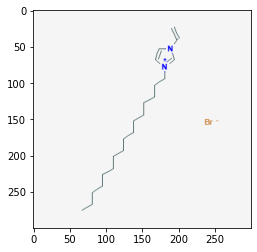

24766550


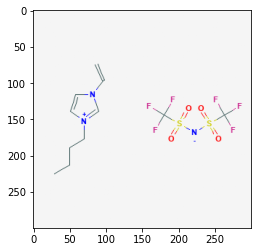

139254006


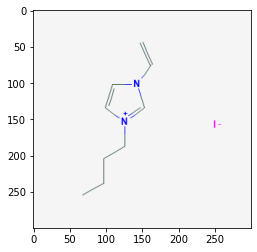

In [77]:
api = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/"
for cid in combinedList[0:5]:
    request = requests.get(api + "cid/" + str(cid) + "/PNG").content
    sleep(1)
    with open(str(cid) + ".png", "wb") as out:
        out.write(request)
    pprint(cid)
    img = mpimg.imread(str(cid) + ".png")
    plt.imshow(img)
    plt.show()